# Simple linear regression 
 **<font color=red, size=2.3em>Simple linear regression</font>** is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables:
    - One variable, denoted x, is regarded as the predictor, explanatory, or independent variable.
    - The other variable, denoted y, is regarded as the response, outcome, or dependent variable.
    
* Because the other terms are used less frequently today, we'll use the "predictor" and "response" terms to refer to the variables encountered in this course. The other terms are mentioned only to make you aware of them should you encounter them in other arenas. Simple linear regression gets its adjective "simple," because it concerns the study of only one predictor variable. In contrast, multiple linear regression, which we study later in this course, gets its adjective "multiple," because it concerns the study of two or more predictor variables*

In [114]:
#Import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import  SelectKBest,chi2
from sklearn.ensemble import ExtraTreesClassifier


In [110]:
#Read the dataset and look at first five rows
data=pd.read_csv("datasets/housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [111]:
data.shape

(20640, 10)

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [113]:
data.values.flatten()

array([-122.23, 37.88, 41, ..., 2.3886, 'INLAND', 89400], dtype=object)

In [119]:
X = data.iloc[:,0:8]  #independent columns
y = data.iloc[:,-1]   #target column i.e price range

In [124]:
#Filling the missing values
pd.DataFrame(X).fillna(method="ffill", inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20640 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
dtypes: float64(4), int64(4)
memory usage: 1.3 MB


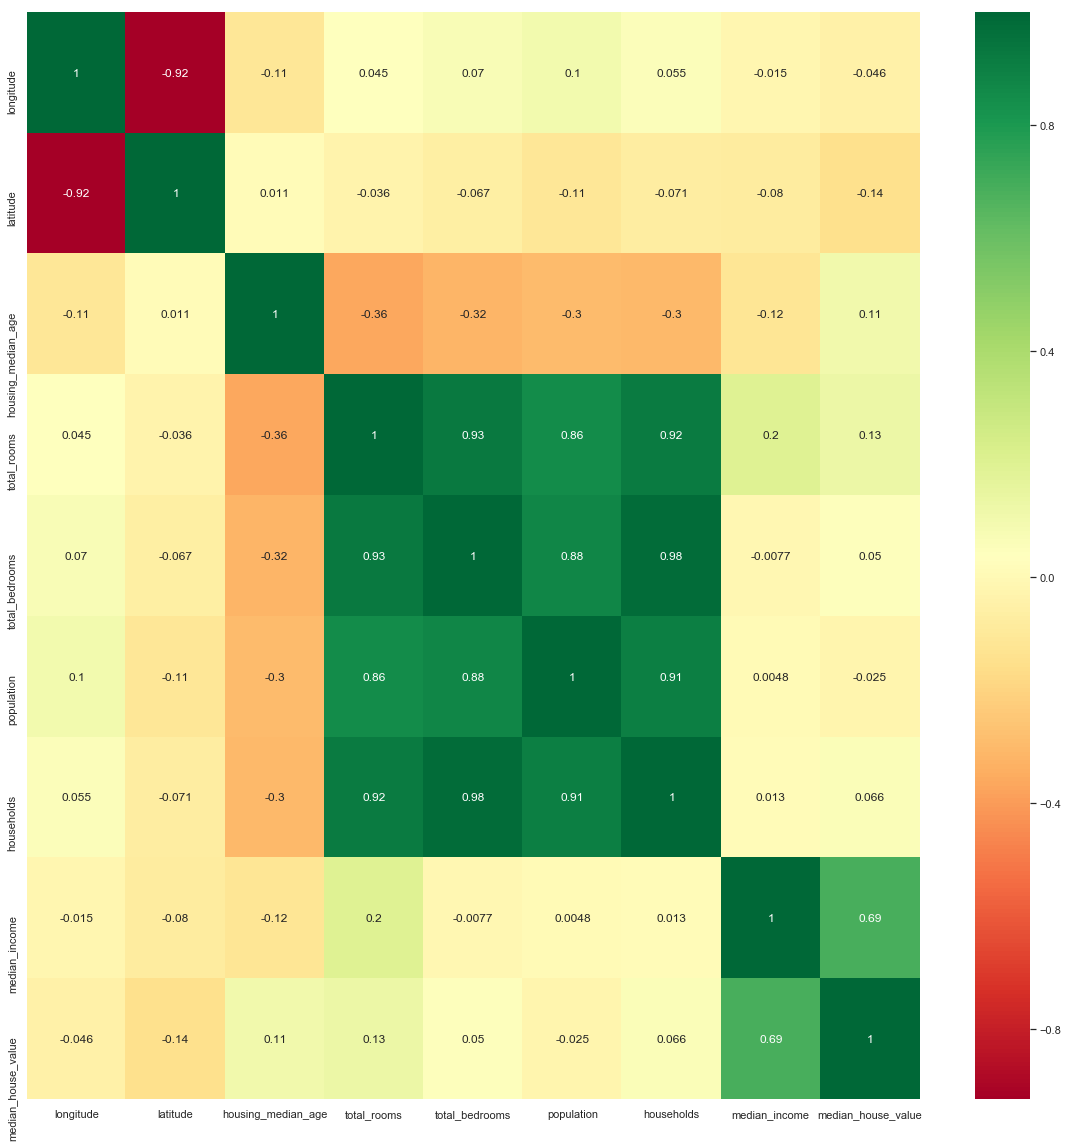

In [129]:
#performing some feature selection
corrmat=data.corr()
top_corr=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr].corr(), annot=True, cmap="RdYlGn")

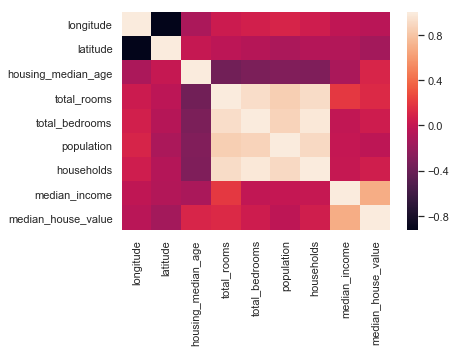

In [130]:
sns.heatmap(data.corr())